In [1]:
from Experiment import Experiment

# Alanine Dipeptide

In [2]:
exp = Experiment(location='../exp/outputs/alanine_dipeptide/alanine_20ns', features='dihedrals')

Successfully initialised metadata.
Successfully initialised datafiles.
No metadynamics bias files supplied; assuming an unbiased trajectory.
Successfully featurized trajectory with 2 features.


In [3]:
exp.get_features()

['PHI 0 ALA 2', 'PSI 0 ALA 2']

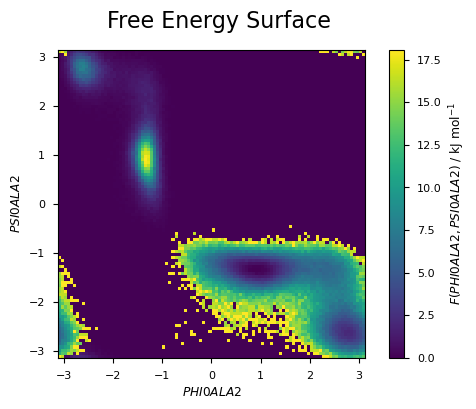

In [4]:
exp.free_energy_plot(features=exp.get_features())

Initiating MSM model with lagtime 10.0 ps (lagstep 100).


KMeans iterations: 100%|██████████| 39/39 [00:01<00:00, 25.37it/s] 


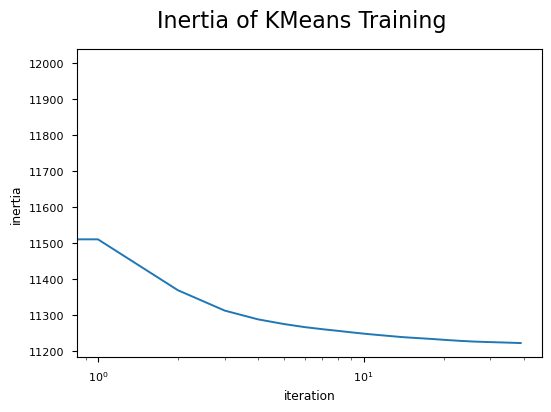

Cluster centres [[-2.127368    2.6601055 ]
 [-1.3627253   0.95492744]
 [-2.602082   -3.0317671 ]
 [-2.658216    2.8669202 ]
 [-1.2447625   0.1375    ]
 [-1.3763325   2.4582555 ]
 [-2.5783489   2.4541655 ]
 [-1.3340229   1.300878  ]
 [-1.311433    0.61106664]
 [-1.3460941   1.8149568 ]]
Weakly connected sets: [array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]
Strongly connected sets: [array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]


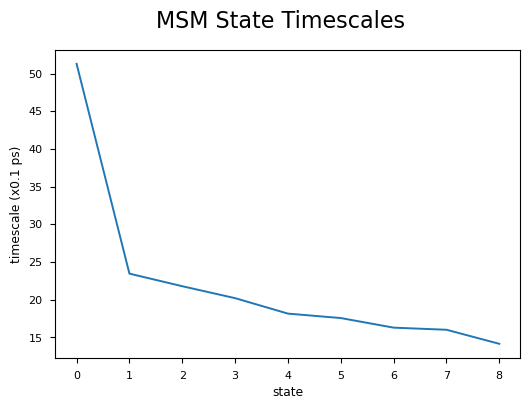

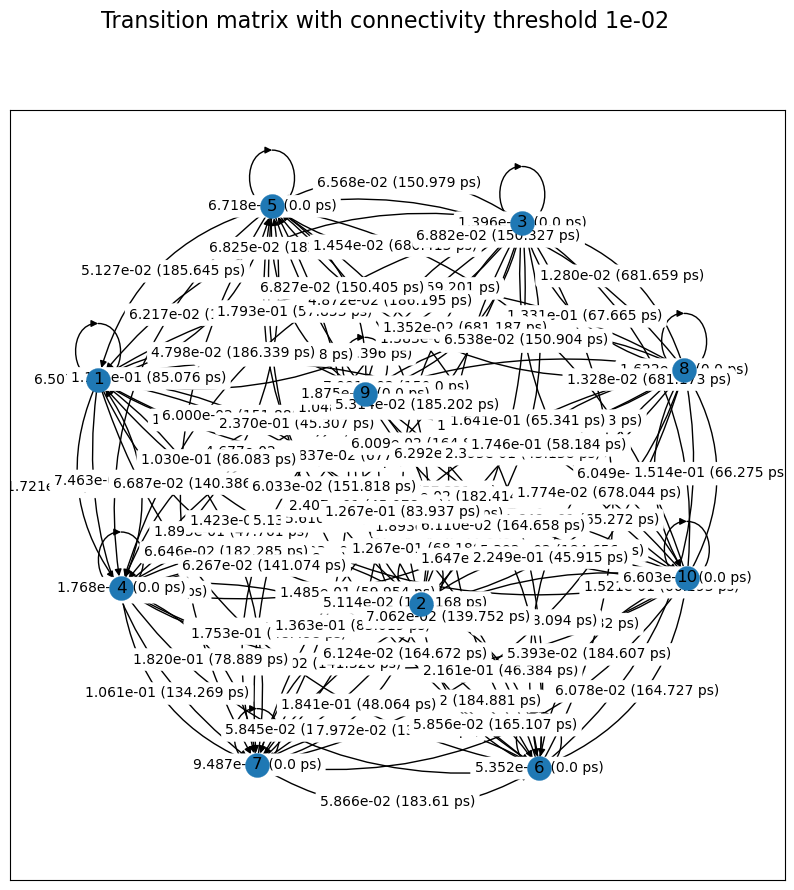

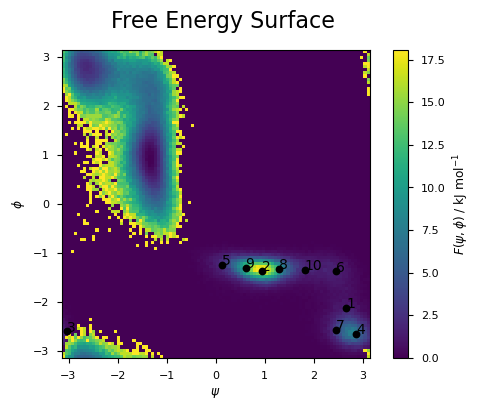

In [5]:
exp.markov_state_model(n_clusters=10, lagtime='10ps', features=['PSI 0 ALA 2', 'PHI 0 ALA 2'], feature_nicknames=['\psi', '\phi'])

# Chignolin

In [ ]:
from Experiment import Experiment
exp = Experiment(location='../exp/outputs/chignolin/5us_NPT_chignolin_1uao', features='dihedrals')

In [ ]:
exp.contact_analysis(contact_threshold=0.5, times=['0ns', '3200ns', '4900ns'])

In [ ]:
exp.implied_timescale_analysis(max_lag=1000, increment=1, yscale='linear')

In [ ]:
print(exp.get_features())

In [ ]:
exp.markov_state_model(n_clusters=10, lagtime='40ns', features=['PHI 0 TYR 2', 'PSI 0 GLY 1'], feature_nicknames=['feat1', 'feat2'])